<a href="https://colab.research.google.com/github/mahavird/Algorithms/blob/master/Image_Matching_Connected_Wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [5]:
!tar -xvzf connected_wise.tar.gz


connected_wise/Image_Matching-1/Detected_Signs/train281.jpg
connected_wise/Image_Matching-1/Detected_Signs/train119.jpg
connected_wise/Image_Matching-1/Detected_Signs/train160.jpg
connected_wise/Image_Matching-1/Detected_Signs/train273.jpg
connected_wise/Image_Matching-1/Detected_Signs/train61.jpg
connected_wise/Image_Matching-1/Detected_Signs/train230.jpg
connected_wise/Image_Matching-1/Detected_Signs/train53.jpg
connected_wise/Image_Matching-1/Detected_Signs/train96.jpg
connected_wise/Image_Matching-1/Detected_Signs/train265.jpg
connected_wise/Image_Matching-1/Detected_Signs/train152.jpg
connected_wise/Image_Matching-1/Detected_Signs/train222.jpg
connected_wise/Image_Matching-1/Detected_Signs/train10.jpg
connected_wise/Image_Matching-1/Querry/DC-389-770-004.png
connected_wise/Image_Matching-1/Detected_Signs/train88.jpg
connected_wise/Image_Matching-1/Detected_Signs/train7.jpg
connected_wise/Image_Matching-1/Detected_Signs/train257.jpg
connected_wise/Image_Matching-1/Detected_Signs/tr

### **This notebook illustrates how we can use ORB feature detection algorithm to solve connected_wise image matching assignment**.


![alt text](https://incubator.ucf.edu/wp-content/uploads/2019/05/Connected-Wise.jpg)

Source: [www:connected-wise.com](https://)

Execute the below command to check the directory structure, it contains the **connected_wise** folder which contains the orginal **Image_Matching-1** dataset folder.




In [6]:

!ls

connected_wise	connected_wise.tar.gz  sample_data


##**Importing all the required libraries** 

In [0]:
from skimage import data
from skimage import io 
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
import glob


# ORB feature detector and binary descriptor


For our Image Matching task we are using the **ORB feature detection and binary description algorithm**.


![alt text](https://scikit-image.org/docs/dev/_images/sphx_glr_plot_orb_001.png)

Following are the two dominans reasons to chose ORB:


*   ORB is based on oriented FAST detection method and the rotated BRIEF
descriptors.
*   Unlike BRIEF, ORB is comparatively scale and rotation invariant while still
employing the very efficient Hamming distance metric for matching.

*   ORB is preferred for real-time applications.

*   ORB is not patented as compared to SIFT, SURF
*   ORB was developed at OpenCV




ORB has six hyperparameters:

    n_keypoints : int, optional
        Number of keypoints to be returned. The function will return the best
        `n_keypoints` according to the Harris corner response if more than
        `n_keypoints` are detected. If not, then all the detected keypoints
        are returned.
    fast_n : int, optional
        The `n` parameter in `skimage.feature.corner_fast`. Minimum number of
        consecutive pixels out of 16 pixels on the circle that should all be
        either brighter or darker w.r.t test-pixel. A point c on the circle is
        darker w.r.t test pixel p if ``Ic < Ip - threshold`` and brighter if
        ``Ic > Ip + threshold``. Also stands for the n in ``FAST-n`` corner
        detector.
    fast_threshold : float, optional
        The ``threshold`` parameter in ``feature.corner_fast``. Threshold used
        to decide whether the pixels on the circle are brighter, darker or
        similar w.r.t. the test pixel. Decrease the threshold when more
        corners are desired and vice-versa.
    harris_k : float, optional
        The `k` parameter in `skimage.feature.corner_harris`. Sensitivity
        factor to separate corners from edges, typically in range ``[0, 0.2]``.
        Small values of `k` result in detection of sharp corners.
    downscale : float, optional
        Downscale factor for the image pyramid. Default value 1.2 is chosen so
        that there are more dense scales which enable robust scale invariance
        for a subsequent feature description.
    n_scales : int, optional
        Maximum number of scales from the bottom of the image pyramid to
        extract the features from.


  The default values are set to :
  
  

```
(downscale=1.2, n_scales=8, n_keypoints=500, fast_n=9, fast_threshold=0.08,
  harris_k=0.04)
```

But after tuning the hypeparameters for our dataset, we are using the following values of hyperparameters:
```
(downscale=1.8, n_scales=8, n_keypoints=1000, fast_n=16, fast_threshold=0.00005,
  harris_k=0.01)
```









Below is a sample code which shows how we can use orb matching algorithm 

33


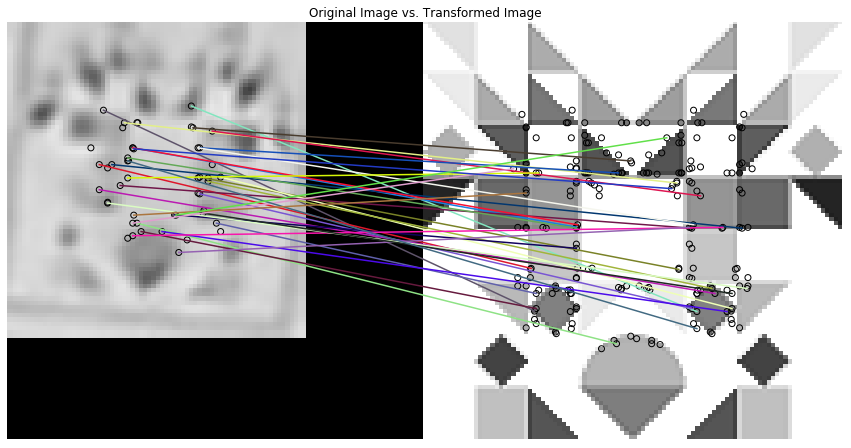

In [0]:
img1 = io.imread('connected_wise/Image_Matching-1/Detected_Signs/train208.jpg') # reading sign image
img1 = rescale(img1, 2, anti_aliasing=False) # increasing the size of the sign image
img1 = rgb2gray(img1) #converting image into grayscale

img2 = io.imread('connected_wise/Image_Matching-1/Querry/FL-286-814-111.png') #reading query image
img2 = rgb2gray(img2)


descriptor_extractor = ORB(downscale=1.2, n_scales=8,
                 n_keypoints=500, fast_n=9, fast_threshold=0.01,
                 harris_k=0.01) #passing the hyperparameters of ORB desscriptor

descriptor_extractor.detect_and_extract(img1) 
keypoints1 = descriptor_extractor.keypoints 
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors


matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True) #matching the descriptor of two images
print(len(matches12)) #count of matches

fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,15))

plt.gray()


plot_matches(ax, img1, img2, keypoints1, keypoints2, matches12)
ax.axis('off')
ax.set_title("Original Image vs. Transformed Image")


plt.show()


In [0]:
def image_compare(filename_query,filename_sign):
    """
    Parameters:
    filename_query: Name of query file
    filename_sign: Name of sign file
    Returns: numbers of inlier matches and returns "-1" if there was no keypoints found in the image
    """
    img1 = io.imread(filename_query) #reading query image
    img1 = rgb2gray(img1)
    
    img2 = io.imread(filename_sign) #reading sign image
    img2 = rescale(img2, 2, anti_aliasing=False)
    img2 = rgb2gray(img2)


    descriptor_extractor = ORB(downscale=1.8, n_scales=8,
                     n_keypoints=1000, fast_n=16, fast_threshold=0.00005,
                     harris_k=0.01)

    try:                                              #exception hadling to avoid runtime errors
        descriptor_extractor.detect_and_extract(img1)
    except:
        return -1
    keypoints1 = descriptor_extractor.keypoints
    descriptors1 = descriptor_extractor.descriptors

    try:
        descriptor_extractor.detect_and_extract(img2)
    except:
        return -1
    keypoints2 = descriptor_extractor.keypoints
    descriptors2 = descriptor_extractor.descriptors


    try:
        matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
    except:
        return -1
    return len(matches12)
    

Results

    We first find the matching keypoint for an image with respect to each query
    Then we label the class to belong to the query which had maximum keypoint images with the image



In [0]:

i=0
dict_comparison = {} #dictionary for storing the number matching keypoints to corresponding query images(name of the query files is the key of this dictionary)
dict_overall = {}    #dictionary for storing the count of images which match with the given query class(name of the query files is the key of this dictionary)
sign_query_match = {} #dictionary for storing the name of images which match with the given query class(name of the query files is the key of this dictionary)
for filename_sign in glob.glob('connected_wise/Image_Matching-1/Detected_Signs/*.jpg'): #reading all .jpg files in Detected_Signs Folder
    j=0
    for filename_query in glob.glob('connected_wise/Image_Matching-1/Querry/*.png'): #reading all .png files in Detected_Signs Folder
        i+=1
        j+=1
        print("counter",i,j)
        dict_comparison[filename_query]= image_compare(filename_query,filename_sign)
    
    max_key = max(dict_comparison, key=dict_comparison.get)
    sign_query_match[filename_sign]=max_key
    #print("max_key",max_key)
    if max_key in dict_overall:
           dict_overall[max_key]+=1
    else:
        dict_overall[max_key]=1

counter 1 1
counter 2 2
counter 3 3
counter 4 4
counter 5 5
counter 6 6
counter 7 7
counter 8 8
counter 9 9
counter 10 10
counter 11 11
counter 12 1
counter 13 2
counter 14 3
counter 15 4
counter 16 5
counter 17 6
counter 18 7
counter 19 8
counter 20 9
counter 21 10
counter 22 11
counter 23 1
counter 24 2
counter 25 3
counter 26 4
counter 27 5
counter 28 6
counter 29 7
counter 30 8
counter 31 9
counter 32 10
counter 33 11
counter 34 1
counter 35 2
counter 36 3
counter 37 4
counter 38 5
counter 39 6
counter 40 7
counter 41 8
counter 42 9
counter 43 10
counter 44 11
counter 45 1
counter 46 2
counter 47 3
counter 48 4
counter 49 5
counter 50 6
counter 51 7
counter 52 8
counter 53 9
counter 54 10
counter 55 11
counter 56 1
counter 57 2
counter 58 3
counter 59 4
counter 60 5
counter 61 6
counter 62 7
counter 63 8
counter 64 9
counter 65 10
counter 66 11
counter 67 1
counter 68 2
counter 69 3
counter 70 4
counter 71 5
counter 72 6
counter 73 7
counter 74 8
counter 75 9
counter 76 10
counter 

# **Results**



*   We first find the matching keypoint for an image with respect to each query
*   Then we label the image to belong to the query which had maximum keypoint matches with the image.







Number of sign images belonging to  connected_wise/Image_Matching-1/Querry/FL-286-814-111.png query: 229
Number of sign images belonging to  connected_wise/Image_Matching-1/Querry/DC-389-770-004.png query: 1


In [0]:
for filename_sign in sign_query_match:
    print( filename_sign, sign_query_match[filename_sign])

connected_wise/Image_Matching-1/Detected_Signs/train33.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train220.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train72.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train70.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train208.jpg connected_wise/Image_Matching-1/Querry/DC-389-770-004.png
connected_wise/Image_Matching-1/Detected_Signs/train245.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train101.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train13.jpg connected_wise/Image_Matching-1/Querry/FL-286-814-111.png
connected_wise/Image_Matching-1/Detected_Signs/train129.jpg 

In [0]:
for i in dict_overall:
    print( "Number of sign images belonging to ",i,"query:", dict_overall[i])

Number of sign images belonging to  connected_wise/Image_Matching-1/Querry/FL-286-814-111.png query: 229
Number of sign images belonging to  connected_wise/Image_Matching-1/Querry/DC-389-770-004.png query: 1


# **Accuracy = (correct classification)/(Total Classification)**

In [0]:
total_sign_images = 230
Number_FL_signs = 229
print("Accuracy",Number_FL_signs/total_sign_images )
print("Accuracy in %",100*Number_FL_signs/total_sign_images )

Accuracy 0.9956521739130435
Accuracy in % 99.56521739130434 %


# **Result**

**Accuracy : 99.56521739130434 %**